In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
MergedData0 = pd.read_csv('Data.csv', index_col=0);
MergedData1 = MergedData0.iloc[:, :-1]
y = pd.read_csv("ovarian_training_genes_set.csv", index_col='gene')
y.rename_axis("DepMap_ID")
y = y == 'positive'
data = MergedData1.merge(y, how='inner', left_index=True, right_index=True)
Data = data.iloc[:, :-1]
y = data.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
AAK1,0.238209,0.011015,0.031624,0.073432,0.105474,0.062314,0.052407,0.105416,0.060706,0.149773,...,2.400538,3.106013,3.426265,3.399171,2.722466,2.195348,2.063503,2.906891,2.049631,2.344828
ABCC2,0.134062,0.023329,0.006485,0.022153,0.033180,0.011782,0.058696,0.043512,0.022388,0.053242,...,0.855990,4.250204,0.443607,1.333424,0.978196,1.111031,0.536053,5.825786,0.565597,0.575312
ABCG1,0.046197,0.347395,0.456456,0.099056,0.136288,0.075231,0.108578,0.078840,0.024284,0.130939,...,0.137504,0.214125,0.042644,0.084064,0.000000,0.970854,0.863938,0.124328,0.189034,1.395063
ABHD17C,0.013039,0.034789,0.036946,0.013561,0.007397,0.009726,0.006413,0.023685,0.003270,0.003720,...,2.829850,2.863938,3.316146,0.201634,2.570463,4.865424,4.231893,3.498251,4.314697,2.134221
ABHD17C,0.013039,0.034789,0.036946,0.013561,0.007397,0.009726,0.006413,0.023685,0.003270,0.003720,...,2.829850,2.863938,3.316146,0.201634,2.570463,4.865424,4.231893,3.498251,4.314697,2.134221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN2,0.017781,0.126561,0.013664,0.010255,0.013543,0.010390,0.019206,0.009364,0.006569,0.029838,...,2.438293,3.085765,3.106013,2.863938,3.531069,3.467279,3.000000,3.127633,2.790772,3.782409
ZSCAN29,0.042534,0.311781,0.042256,0.063401,0.078897,0.006957,0.102415,0.025590,0.037839,0.026792,...,3.713696,3.195348,3.371559,3.936402,3.182692,4.412782,2.662205,2.935460,3.364572,3.555816
ZSCAN29,0.042534,0.311781,0.042256,0.063401,0.078897,0.006957,0.102415,0.025590,0.037839,0.026792,...,3.713696,3.195348,3.371559,3.936402,3.182692,4.412782,2.662205,2.935460,3.364572,3.555816
ZW10,0.555867,0.007427,0.071035,0.213754,0.169463,0.163544,0.128432,0.947852,0.130615,0.174493,...,4.118526,2.247928,5.005400,4.213347,4.361768,4.418190,3.349082,4.179511,3.889474,4.536675


AAK1       False
ABCC2      False
ABCG1      False
ABHD17C    False
ABHD17C    False
           ...  
ZSCAN2     False
ZSCAN29    False
ZSCAN29    False
ZW10       False
ZW10       False
Name: label, Length: 960, dtype: bool

In [3]:
data_gene_dep = Data.iloc[:, 0:1086]
data_gene_dep;
data_gene_eff = Data.iloc[:, 1087:2172]
data_gene_eff;
data_express = Data.iloc[:, 2173:3578]
data_express;

In [4]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X1 = pca.fit_transform(data_gene_dep)
print(pca.explained_variance_ratio_)

[0.85113288 0.0084742  0.00762432 0.00617622 0.0048388  0.00437109
 0.00356805 0.00329834]


In [5]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X2 = pca.fit_transform(data_gene_eff)
print(pca.explained_variance_ratio_)

[0.9052373  0.00598697 0.0054435  0.00437911 0.00340565 0.00269935
 0.00247001 0.00198969]


In [6]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X3 = pca.fit_transform(data_express)
print(pca.explained_variance_ratio_)

[0.83297736 0.02637972 0.01773364 0.01071045 0.00508367 0.00401742
 0.00369112 0.00360801]


In [7]:
X4 = np.concatenate((X1, X2, X3), axis=1)
print(X4.shape)

(960, 24)


(334, 24)
(334,)
176


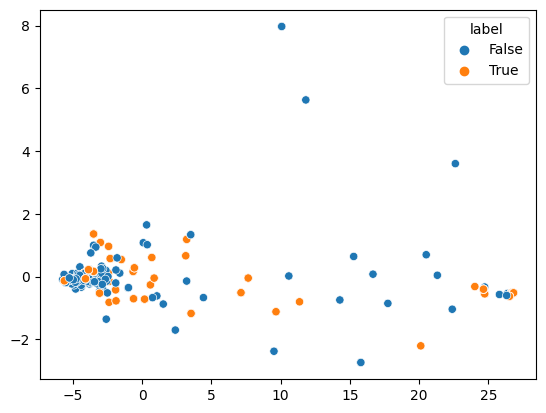

In [8]:
select = np.maximum(y, np.random.rand(len(y)) < sum(y)/(len(y) - sum(y)))
X4 = X4[select]
y = y[select]
print(X4.shape)
print(y.shape)
print(sum(y))
sns.scatterplot(x= X4[:,0], y=X4[:,1], hue=y)
plt.show()

In [9]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)

# Fit the model
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rt = model.predict_proba(X_test)[:, 1]

accuracy = str(accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
auc_value = str(auc(fpr, tpr))
precision = str(precision_score(y_test, y_pred))
recall = str(recall_score(y_test, y_pred))
f1score = str(f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.7128712871287128
Precision:0.7636363636363637
Recall:0.7241379310344828


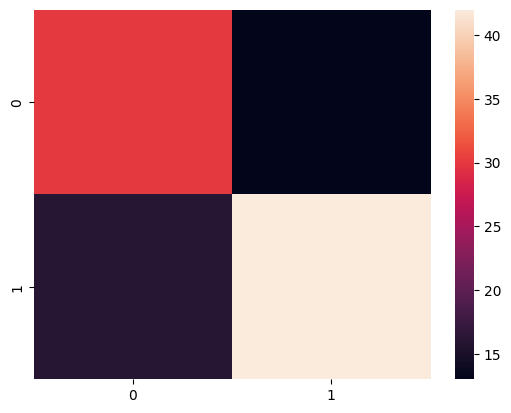

[[30 13]
 [16 42]]


In [10]:
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall:" + recall)

conf_mx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mx)
plt.show()

print(conf_mx)

In [11]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 8)                 608       
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
8/8 [==============================] - 3s 103ms/step - loss: 2.8346 - accuracy: 0.4206 - val_loss: 2.0338 - val_accuracy: 0.4851
Epoch 2/5
8/8 [==============================] - 0s 35ms/step - loss: 1.7211 - accuracy: 0.5064 - val_loss: 3.5381 - val_accuracy: 0.5446
Epoch 3/5
8/8 [==============================] - 0s 30ms/step - loss: 1.7569 - accuracy: 0.5536 - val_loss: 1.5474 - val_accuracy: 0.5149
Epoch 4/5
8/8 [==============================] - 0s 40ms/step - loss: 1.3673 - accuracy: 0.5622 - val_loss: 3.4295 - val_accuracy: 0.5545
Epoch 5/5
8/8 [==============================] - 0s 37ms/step - loss: 1.4834 - accuracy: 0.5794 - val_loss: 2.8749 - val_accuracy: 0.4752


Text(0, 0.5, 'Loss')

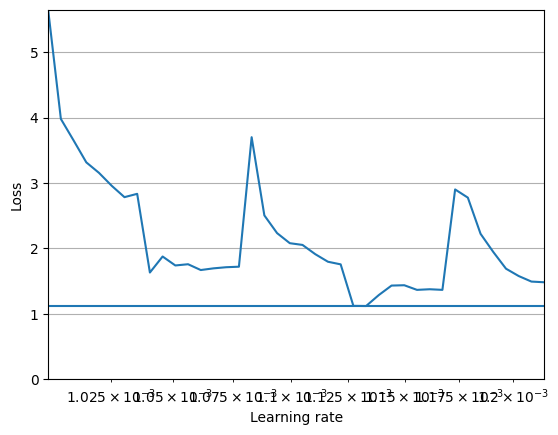

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [18]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 1.1204642057418823
Best learning rate: 0.0011327956


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [21]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [22]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "ovariantypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\ovariantypes_logs\\run_001'

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.0005, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("ovariantypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
8/8 [==============================] - 2s 74ms/step - loss: 3.5220 - accuracy: 0.3348 - val_loss: 1.9188 - val_accuracy: 0.4158
Epoch 2/200
8/8 [==============================] - 0s 69ms/step - loss: 1.4530 - accuracy: 0.4936 - val_loss: 1.5290 - val_accuracy: 0.4455
Epoch 3/200
8/8 [==============================] - 0s 35ms/step - loss: 1.3716 - accuracy: 0.5708 - val_loss: 1.0521 - val_accuracy: 0.5644
Epoch 4/200
8/8 [==============================] - 0s 21ms/step - loss: 0.9477 - accuracy: 0.6223 - val_loss: 0.8941 - val_accuracy: 0.6238
Epoch 5/200
8/8 [==============================] - 0s 14ms/step - loss: 0.7789 - accuracy: 0.6567 - val_loss: 1.6806 - val_accuracy: 0.5248
Epoch 6/200
8/8 [==============================] - 0s 13ms/step - loss: 0.9113 - accuracy: 0.6352 - val_loss: 1.1097 - val_accuracy: 0.5743
Epoch 7/200
8/8 [==============================] - 0s 17ms/step - loss: 0.9670 - accuracy: 0.6652 - val_loss: 0.7177 - val_accuracy: 0.6040
Epoch 8/200
8/8 [===

In [24]:
model = keras.models.load_model("ovariantypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 3ms/step - loss: 0.2732 - accuracy: 0.8927


[0.2732113301753998, 0.8927038908004761]

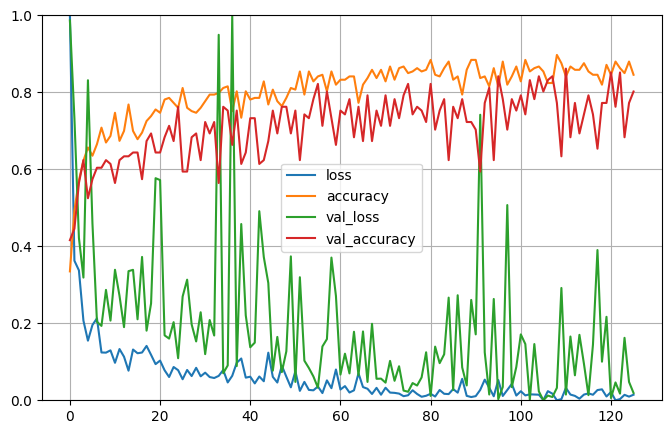

In [25]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()